In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [4]:
from keras.applications import inception_v3

Using TensorFlow backend.


In [5]:
model=inception_v3.InceptionV3(weights='imagenet')
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

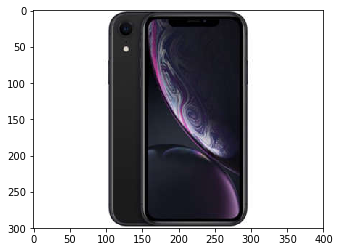

In [12]:
from PIL import Image

image=Image.open('iphone.jpg')
plt.imshow(image)

In [13]:
from keras import preprocessing

img=preprocessing.image.load_img('iphone.jpg',target_size=(300,300))
x=preprocessing.image.img_to_array(img)
x=np.expand_dims(x,axis=0)
x=inception_v3.preprocess_input(x)
predictions=model.predict(x)
labels=inception_v3.decode_predictions(predictions,top=3)[0]
labels

[('n03584254', 'iPod', 0.18395686),
 ('n02992529', 'cellular_telephone', 0.1775716),
 ('n03666591', 'lighter', 0.10710561)]

In [ ]:
import time

camera=cv2.VideoCapture(0)
camera_height=500

while(True):
    #read a new frame
    _,frame=camera.read()
    
    #flip the camera so as not to work with a mirror image
    frame=cv2.flip(frame,1)
    
    #rescaling
    aspect=frame.shape[1]/float(frame.shape[0])
    res=int(aspect*camera_height) #landscape orientation-wide image
    
    frame=cv2.resize(frame,(res,camera_height))
    
    #add rectangle
    cv2.rectangle(frame,(300,75),(650,425),(240,100,0),2)
    
    #get roi
    roi=frame[75+2:425-2,300+2:650-2]
    
    roi=cv2.cvtColor(roi,cv2.COLOR_BGR2RGB)
    roi=cv2.resize(roi,(399,399))
    roi=inception_v3.preprocess_input(roi)
    
    #predict
    roi2=np.array([cv2.cvtColor(roi,cv2.COLOR_BGR2RGB)])
    predictions=model.predict(roi2)
    labels=inception_v3.decode_predictions(predictions,top=3)[0]
    
    #add text
    label_1='{}-{}%'.format(labels[0][1],int(labels[0][2]*100))
    cv2.putText(frame,label_1,(70,170),
               cv2.FONT_HERSHEY_SIMPLEX,0.9,(20,240,240),2)
    
    label_2='{}-{}%'.format(labels[1][1],int(labels[1][2]*100))
    cv2.putText(frame,label_2,(70,200),
               cv2.FONT_HERSHEY_SIMPLEX,0.9,(20,240,240),2)
    
    label_3='{}-{}%'.format(labels[2][1],int(labels[2][2]*100))
    cv2.putText(frame,label_3,(70,230),
               cv2.FONT_HERSHEY_SIMPLEX,0.9,(20,240,240),2)
    cv2.imshow("Real Time object detection",frame)
    key=cv2.waitKey(1)
    
    if key and 0xff==ord('q'):
        break

camera.release()
cv2.destroyAllWindows
    
    